In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fipy import Variable, FaceVariable, CellVariable, Grid1D, Grid2D, Grid3D, ExplicitDiffusionTerm, TransientTerm, DiffusionTerm, ImplicitSourceTerm
from fipy.tools import numerix, dot
from fipy import input
from builtins import range

import heat_transfer as bht
import model_fins as modfins

In [41]:
from fipy.tools import dot

In [ ]:
length = 0.050
height = 0.020
thickness = 0.001

nx = 100
ny = int ((nx/length) * height)
nz = 10

dx = length / nx
dy = height / ny
dz = thickness / nz

# mesh = Grid1D(nx=nx, dx=dx)

mesh = Grid3D(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz)

phi = CellVariable(name="solution variable",
                    mesh=mesh,
                    value=10.)

k = 226
D = 9.7e-5

valueLeft = 10
valueRight = 2

phi.constrain(valueLeft, mesh.facesLeft)
# phi.constrain(valueRight, mesh.facesRight)

### CONVECTION

# Convection boundary conditions on front and back faces
T_infinity = 50.  # Ambient temperature
h = 10  # Convection coefficient

# Define the convection condition on the front and back faces
# Heat flux on front and back faces: q = h * (T_infinity - T)

A_facecell = dx * dy
convective_flux = h * A_facecell * (T_infinity - phi.faceValue)

gradient = convective_flux / (k*A_facecell)

# phi.faceGrad.constrain(gradient * mesh.faceNormals, where=mesh.facesFront)
# phi.faceGrad.constrain(gradient * mesh.faceNormals, where=mesh.facesBack)

q_conv_front = h * (T_infinity - phi.faceValue[mesh.facesFront])
q_conv_back = h * (T_infinity - phi.faceValue[mesh.facesBack])

# Apply heat flux boundary condition (q = -k * dT/dn) on the front and back faces
phi.faceGrad.constrain((q_conv_front / k) * mesh.faceNormals, where=mesh.facesFront)
# phi.faceGrad.constrain(q_conv_back / k, where=mesh.facesBack)

# Apply convection boundary condition on the front and back faces
# phi.faceGrad.constrain((0., 0., convective_flux / D), where=mesh.facesTop)
# phi.faceGrad.constrain(convective_flux / D, where=mesh.facesRight)

# Steady state

DiffusionTerm(coeff=D).solve(var=phi)

# L = nx * dx
# print(phi.allclose(valueLeft + (valueRight - valueLeft) * x / L,
#                    rtol = 1e-10, atol = 1e-10))

# plt.plot(phi.value)

### 2e essai

In [241]:
length = 0.050
height = 0.020
thickness = 0.001

nx = 70
ny = int ((nx/length) * height)
nz = 5

dx = length / nx
dy = height / ny
dz = thickness / nz

# mesh = Grid1D(nx=nx, dx=dx)

mesh = Grid3D(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz)

phi = CellVariable(name="solution variable",
                    mesh=mesh,
                    value=10.)

k = 226
D = 9.7e-5

valueLeft = 20
valueRight = 2

phi.constrain(valueLeft, mesh.facesLeft)
# phi.constrain(valueRight, mesh.facesRight)

### CONVECTION

# Convection boundary conditions on front and back faces
T_infinity = 25.  # Ambient temperature
h = 10  # Convection coefficient

total_side_transfer = 0.5

phi.faceGrad.constrain(total_side_transfer*1000/k * mesh.faceNormals, where=mesh.facesFront)
phi.faceGrad.constrain(total_side_transfer*1000/k * mesh.faceNormals, where=mesh.facesBack)

# Steady state
DiffusionTerm(coeff=D).solve(var=phi)

# L = nx * dx
# print(phi.allclose(valueLeft + (valueRight - valueLeft) * x / L,
#                    rtol = 1e-10, atol = 1e-10))

# plt.plot(phi.value)

In [233]:
phi.value

array([20.44020411, 21.31817537, 22.19336055, ..., 57.75168493,
       57.78882042, 57.80739238])

In [90]:
# # Get the temperature at the front faces
# T_facesFront = phi.faceValue[mesh.facesFront]  # Temperature at the front faces

# # Convective heat flux on the front faces depends on the temperature at each face
# convective_flux_front = h * (T_infinity - T_facesFront)

# # Similarly, you can do this for the back faces if needed
# T_facesBack = phi.faceValue[mesh.facesBack]  # Temperature at the back faces
# convective_flux_back = h * (T_infinity - T_facesBack)

In [237]:
phi = CellVariable(name="solution variable",
                    mesh=mesh,
                    value=25.)

In [229]:
convective_flux = h * (T_infinity - phi.faceValue)

In [245]:
phi = CellVariable(name="solution variable",
                    mesh=mesh,
                    value=20.)

k = 226
D = 9.7e-5

valueLeft = 20

phi.constrain(valueLeft, mesh.facesLeft)

# Apply the convective flux as a boundary condition
# The heat flux on the front faces is proportional to the temperature difference
phi.faceGrad.constrain((convective_flux.value * mesh.faceNormals) / k, where=mesh.facesFront)
phi.faceGrad.constrain((convective_flux.value * mesh.faceNormals) / k, where=mesh.facesBack)

# Steady state
DiffusionTerm(coeff=D).solve(var=phi)

In [27]:
10 * (50 -11) 

390

In [26]:
convective_flux_front.value

array([399.74896388, 399.25381356, 398.76380117, ..., 375.0138    ,
       375.0038    , 374.9988    ])

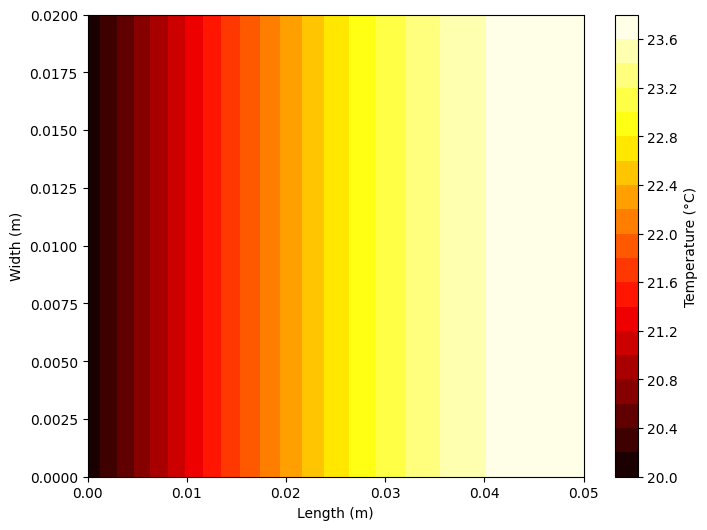

In [246]:
mapplot = np.array(phi.value).reshape((nz, ny, nx))

# Choose a specific z-layer (e.g., layer 5 out of 10)
z_layer = 0  # Choose a z-layer index between 0 and nz-1
temperature_z_layer = mapplot[z_layer, :, :]
temperature_z_layer.shape
# temperature_z_layer = temperature_z_layer.transpose()

# Create the x and y grids for the 2D plot
x = np.linspace(0, length, nx)
y = np.linspace(0, height, ny)
X, Y = np.meshgrid(x, y)

# Plot the temperature distribution in 2D
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, temperature_z_layer, 20, cmap='hot')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Length (m)')
plt.ylabel('Width (m)')
plt.show()

In [175]:
10 * height * length * (50-23)

0.2700000000000001

In [214]:
dTx_dx = np.gradient(temperature_z_layer[0], x)
print('transfer at base', dTx_dx[0] * k * thickness * height)

transfer at base 0.09054199614262455


1.0019319350571219

In [51]:
n_front

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [-1, -1, -1, ..., -1, -1, -1]])

In [215]:
face_bc = mesh.facesBack
# 1. Compute the temperature gradient at the front faces
gradT_front = phi.faceGrad[:, face_bc]  # Temperature gradient at front faces

# 2. Get the face normals at the front faces
n_front = mesh.faceNormals[:, face_bc]  # Normal vectors at front faces

# 3. Convert both to NumPy arrays for element-wise operation
gradT_front_np = gradT_front.value  # Convert FiPy gradient to NumPy array

# 4. Compute the flux at each face: q = -k * (gradT . n)
# Manually calculate the dot product in NumPy
flux_front_np = -k * np.sum(gradT_front_np * n_front, axis=0)

# 5. Compute the face areas (for each front face)
A_face_front = dx * dy  # Assuming all faces have the same area for this mesh

# 6. Compute the overall flux by summing over all front faces
total_flux_front = np.sum(flux_front_np * A_face_front)

print(f"Total heat flux through mesh.facesFront: {total_flux_front} W")
print(total_flux_front * 2)

Total heat flux through mesh.facesFront: -0.04663548781273061 W
-0.09327097562546122


In [55]:
2*0.226

0.452

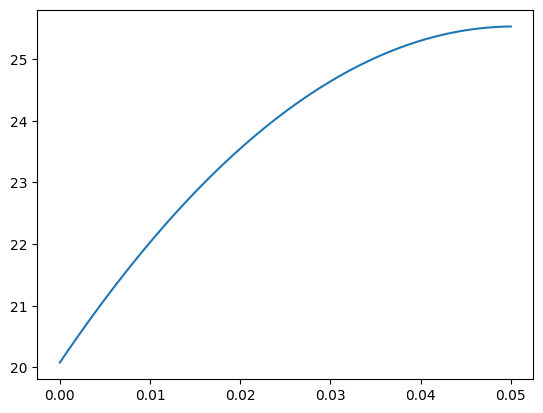

In [155]:
plt.plot(x, temperature_z_layer[0])
# plt.plot(x, dTx_dx)

In [216]:
# Face areas (area of each face on the front/back surface)
A_face_frontback = dx * dy  # Face area is the same for each face on the front/back (dx * dy)

# Get the temperature at the front and back faces
T_facesFront = phi.faceValue[mesh.facesFront]  # Temperature at the front faces
T_facesBack = phi.faceValue[mesh.facesBack]    # Temperature at the back faces

# Convective heat flux on the front and back faces
q_facesFront = h * (T_infinity - T_facesFront)
q_facesBack = h * (T_infinity - T_facesBack)

# Total heat transfer on the front and back faces (sum of q * A for all faces)
total_heat_transfer_front = numerix.sum(q_facesFront * A_face_frontback)
total_heat_transfer_back = numerix.sum(q_facesBack * A_face_frontback)

# Total heat transfer provided by convection on both front and back
total_heat_transfer = total_heat_transfer_front + total_heat_transfer_back

print(f"Total heat transfer on front faces: {total_heat_transfer_front} W")
print(f"Total heat transfer on back faces: {total_heat_transfer_back} W")
print(f"Total heat transfer (front + back): {total_heat_transfer} W")

Total heat transfer on front faces: 0.04660955167378612 W
Total heat transfer on back faces: 0.04660955167378613 W
Total heat transfer (front + back): 0.09321910334757225 W


In [217]:
lambda_fin = thickness
H_fin = height
L_fin = length

Bi = bht.Biot(lambda_fin, k, h, H_fin)
Ac = lambda_fin * H_fin

# (bc, L_fin_, lambd_, Ac_, k_, Bi_)
theoretical = - modfins.gamma_fin('free_end', L_fin, lambda_fin, Ac, k, Bi) * (valueLeft - T_infinity)
print('Bi', Bi)
print('theory', theoretical)
np.abs(total_heat_transfer.value - theoretical) / theoretical

Bi 4.646017699115045e-05
theory 0.09839765389721147


0.052628801038781516

In [ ]:
mesh = Grid3D(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz)

phi = CellVariable(name="solution variable",
                    mesh=mesh,
                    value=10.)

phi.constrain(valueLeft, mesh.facesLeft)

mask = (mesh.facesFront | mesh.facesBack)

Gamma = FaceVariable(mesh=mesh, value=D)
Gamma.setValue(0., where=mask)
dPf = FaceVariable(mesh=mesh,
                   value=mesh._faceToCellDistanceRatio)
n = mesh.faceNormals
# a = FaceVariable(mesh=mesh, value=h, rank=1)
b = FaceVariable(mesh=mesh, value=k, rank=0)
g = FaceVariable(mesh=mesh, value=h*T_infinity, rank=0)
RobinCoeff = (mask * D * n / (-dPf.dot(h*n) + b))
eqn = ( DiffusionTerm(coeff=Gamma) + (RobinCoeff * g).divergence
       - ImplicitSourceTerm(coeff=(RobinCoeff * n.dot(h*n)).divergence))

In [ ]:
# Define the mesh
nx = 50
dx = 0.001
dy = dx
dz = dx
ny = nx
nz = 1  # 2D approximation with 1 cell in z-direction

mesh = Grid3D(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz)

# Define the temperature variable
phi = CellVariable(name="solution variable", mesh=mesh, value=10.)

# Diffusivity (thermal conductivity)
D = 9.7e-5

# Dirichlet boundary condition at the left face (fixed temperature)
phi.constrain(10, mesh.facesLeft)

# Ambient temperature and convection coefficient for Robin BC
T_infinity = 50.0  # Ambient temperature (°C)
h = 10.0  # Convection coefficient (W/m²·K)

# Create a mask for the Robin BC on the front and back faces
mask = (mesh.facesFront | mesh.facesBack)

# Robin boundary condition terms
b = h  # Convection coefficient
g = h * T_infinity  # Heat flux due to ambient temperature

# Apply Robin boundary condition as an implicit source term and flux constraint
RobinCoeff = FaceVariable(mesh=mesh, value=mask * b)  # Masked on front and back faces

# Define the equation with DiffusionTerm and implicit source for the Robin BC
eq = (DiffusionTerm(coeff=D)
      - ImplicitSourceTerm(coeff=RobinCoeff)
      + RobinCoeff * g)

# Solve the equation
eq.solve(var=phi)

In [145]:
mesh = Grid3D(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz)


In [ ]:
mapplot = np.array(phi.value).reshape((nx, ny))

# Create the x and y grids for the 2D plot
x = np.linspace(0, length, nx)
y = np.linspace(0, height, ny)
X, Y = np.meshgrid(x, y)

# Plot the temperature distribution in 2D
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, mapplot, 20, cmap='hot')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Length (m)')
plt.ylabel('Width (m)')
plt.show()

In [ ]:
mesh

In [ ]:
num_true_faces_front = np.count_nonzero(mesh.facesBack.value)
print(num_true_faces_front)

In [ ]:
mesh.faceNormals

In [ ]:
FixedFlux = 

In [ ]:
phi.faceGrad.value.shape

In [ ]:
50*50*2 + 50*4

In [ ]:
phi.value

In [ ]:
mapplot

In [ ]:
print(len(phi.value))
print(mapplot)

In [40]:
mesh = Grid1D(nx=nx, dx=dx)
# mesh = Grid2D(nx=nx, ny=ny, dx=dx, dy=dy)

In [ ]:
np.array([[0.0005, 0.0015, 0.0025, 0.0035, 0.0045, 0.0055, 0.0065, 0.0075,
        0.0085, 0.0095, 0.0105, 0.0115, 0.0125, 0.0135, 0.0145, 0.0155,
        0.0165, 0.0175, 0.0185, 0.0195, 0.0205, 0.0215, 0.0225, 0.0235,
        0.0245, 0.0255, 0.0265, 0.0275, 0.0285, 0.0295, 0.0305, 0.0315,
        0.0325, 0.0335, 0.0345, 0.0355, 0.0365, 0.0375, 0.0385, 0.0395,
        0.0405, 0.0415, 0.0425, 0.0435, 0.0445, 0.0455, 0.0465, 0.0475,
        0.0485, 0.0495]]).shape

In [ ]:
mesh.cellFaceIDs

In [ ]:
mesh.facesRight

In [ ]:
FaceVariable(value=np.array([[0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
        0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
        0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
        0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
        0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
        0.045, 0.046, 0.047, 0.048, 0.049, 0.05 ]]), mesh=UniformGrid1D(dx=0.001, nx=50))[0]

In [ ]:
mesh.cellCenters

In [ ]:
mesh.facesRight